In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('dados_limpos.csv', encoding='latin1', parse_dates=['DATA'])

In [3]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA
0,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60,13
1,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84,18
2,2016,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1
3,2016,1,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,16
4,2016,1,ACIR GURGACZ,Aquisição de Material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00,1


In [4]:
df.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
DIA                           int64
dtype: object

In [5]:
df.describe()

,ANO,MES,VALOR_REEMBOLSADO,DIA
count,26689.0,26689.000000,26689.000000,26689.000000
mean,2016.0,6.470643,947.459999,15.430252
std,0.0,3.257113,2733.916295,8.846683
min,2016.0,1.000000,0.010000,1.000000
25%,2016.0,4.000000,124.000000,8.000000
50%,2016.0,6.000000,324.700000,15.000000
75%,2016.0,9.000000,956.660000,23.000000
max,2016.0,12.000000,256980.000000,31.000000


In [6]:
df[df['VALOR_REEMBOLSADO'] == 0.01]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA
6847,2016,3,FERNANDO BEZERRA COELHO,Passagens,07.575.651/0001-59,GOL,NFPJ4Z,2016-03-22,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01,22
6848,2016,3,FERNANDO BEZERRA COELHO,Passagens,07.575.651/0001-59,GOL,OEI85P,2016-03-30,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01,30
11278,2016,6,JORGE VIANA,Passagens,33.937.681/0001-78,LATAM,3EY28M,2016-02-06,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",0.01,6
11494,2016,12,JORGE VIANA,Passagens,07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,NCNMYL,2016-10-17,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",0.01,17
18747,2016,6,PEDRO CHAVES DOS SANTOS FILHO,Passagens,12.281.922/0001-01,Via Berrini Turismo e Eventos Ltda ME,FT00020270,2016-07-21,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",0.01,21
23300,2016,3,TELMÁRIO MOTA,Passagens,11.489.244/0001-04,CONTINENTAL TURISMO,BGNV5G,2016-03-31,"Companhia Aérea: GOL, Localizador: BGNV5G. Pas...",0.01,31


In [7]:
df[df['VALOR_REEMBOLSADO'] == 256980]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA
4637,2016,12,DAVI ALCOLUMBRE,Divulgações,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0,22


In [8]:
senadores_com_mais_gastos = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum()

In [9]:
senadores_com_mais_gastos = senadores_com_mais_gastos.sort_values(ascending=False)

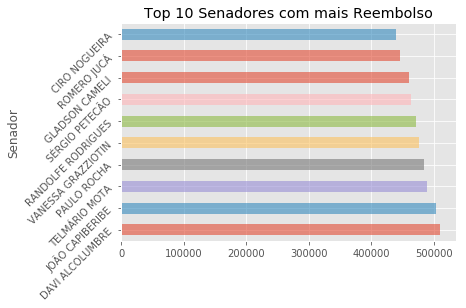

In [10]:
senadores_com_mais_gastos.head(10).plot(kind='barh', grid=True, rot= 45, alpha=0.6)
plt.title('Top 10 Senadores com mais Reembolso')
plt.ylabel('Valor Reembolso')
plt.ylabel('Senador')
plt.savefig('Barras')
plt.show()

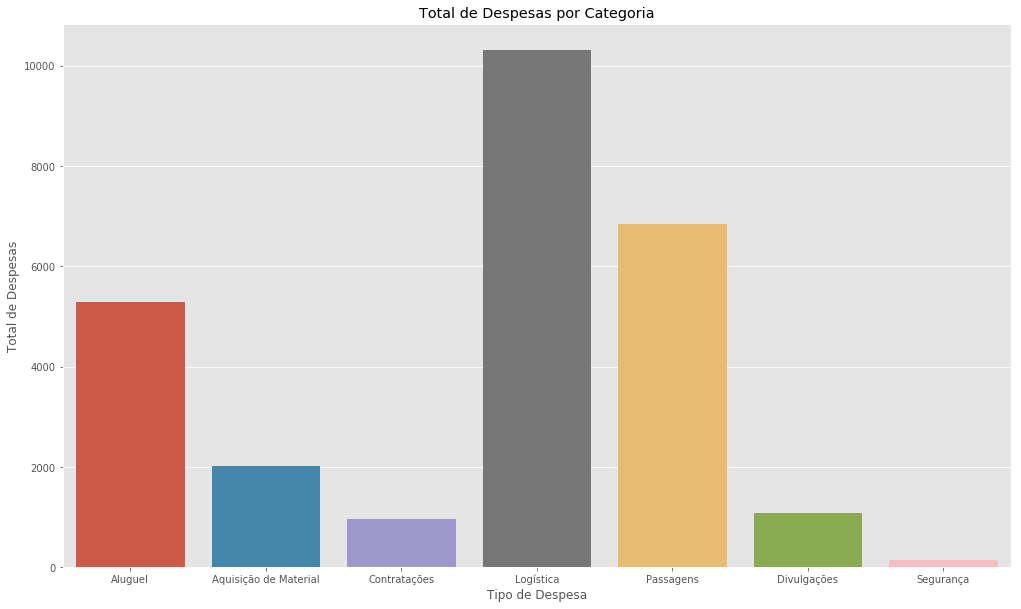

In [11]:
plt.figure(figsize=(17, 10))
sns.countplot(x=df['TIPO_DESPESA'])
plt.title('Total de Despesas por Categoria')
plt.ylabel('Total de Despesas')
plt.xlabel('Tipo de Despesa')
plt.show()

In [12]:
df['ANO_MES'] = df['DATA'].dt.strftime('%Y-%m')

In [13]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA,ANO_MES
0,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60,13,2016-01
1,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84,18,2016-01
2,2016,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1,2016-04
3,2016,1,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,16,2016-01
4,2016,1,ACIR GURGACZ,Aquisição de Material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00,1,2016-06


In [14]:
pivot_df = df.pivot_table(index='ANO_MES', 
                          columns='TIPO_DESPESA', 
                          values='VALOR_REEMBOLSADO', 
                          aggfunc=np.count_nonzero,
                          fill_value=0)
pivot_df = pivot_df.loc['2016-01':'2016-12']

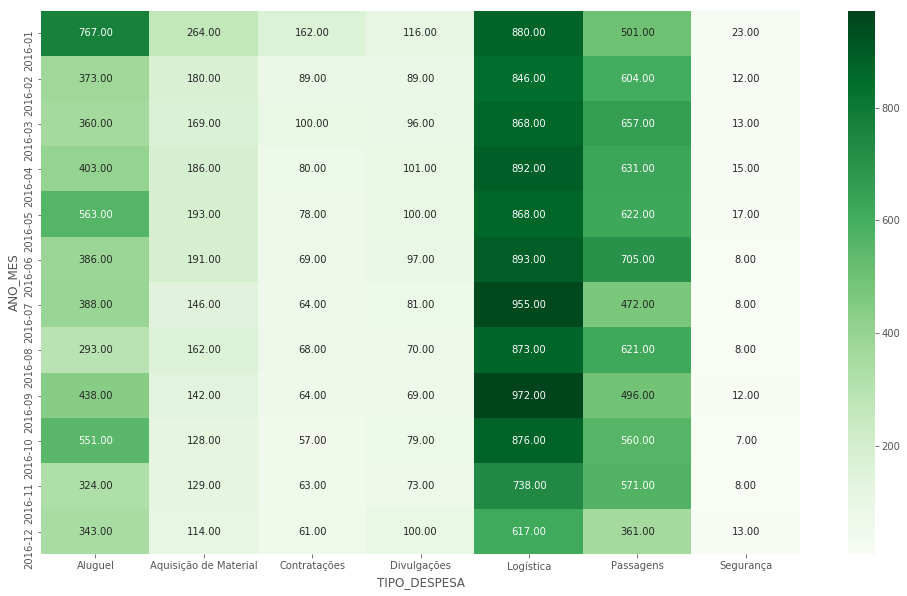

In [22]:
plt.figure(figsize=(17, 10))
sns.heatmap(pivot_df, annot=True, fmt='.2f', cmap='Greens')
plt.show()